In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from neuralforecast.models import LSTM # Tentar LSTM do Keras

from src.data.loaders import CommodityLoader
from src.models.ensemble.dynamic_selection.dcs_la.dcs_la import DCSLARegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score
)

import warnings
from sklearn.exceptions import UndefinedMetricWarning

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 
}
plt.rcParams.update(dark_style)
rcParams['figure.figsize'] = (18,7)

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
models = [
    LGBMRegressor(
        n_estimators=1000, 
        learning_rate=0.1, 
        max_depth=10, 
        num_leaves=63, 
        min_child_samples=5, 
        reg_alpha=0, 
        reg_lambda=0.01, 
        random_state=42, 
        verbose=-1
    ),
    # LSTM(
    #     h=1,
    #     input_size=1,
    #     encoder_n_layers=2,
    #     encoder_hidden_size=64,
    #     decoder_layers=2,
    #     decoder_hidden_size=32,
    #     max_steps=500,
    #     learning_rate=0.001,
    #     batch_size=32
    # ),
    XGBRegressor(
        n_estimators=50, 
        learning_rate=0.03125, 
        reg_alpha=0, 
        reg_lambda=0.01, 
        max_depth=6, 
        objective='reg:squarederror'
    ),
    MLPRegressor(
        hidden_layer_sizes=(64, 32), 
        activation='relu', 
        solver='adam', 
        learning_rate_init=0.001, 
        max_iter=500, 
        random_state=42
    ),
    RandomForestRegressor(
        n_estimators=5, 
        min_samples_leaf=5, 
        max_depth=5
    ),
    SVR(
        C=10.0,
        gamma=0.5,
        epsilon=0.25
    )
]

models_top_k_10 = [
    LGBMRegressor(
        n_estimators=1000, 
        learning_rate=0.1, 
        max_depth=10, 
        num_leaves=63, 
        min_child_samples=5, 
        reg_alpha=0, 
        reg_lambda=0.01, 
        random_state=42, 
        verbose=-1
    ),
    # LSTM(
    #     h=1,
    #     input_size=12,
    #     encoder_n_layers=2,
    #     encoder_hidden_size=64,
    #     decoder_layers=2,
    #     decoder_hidden_size=32,
    #     max_steps=500,
    #     learning_rate=0.001,
    #     batch_size=32
    # ),
    XGBRegressor(
        n_estimators=50, 
        learning_rate=0.03125, 
        reg_alpha=0, 
        reg_lambda=0.01, 
        max_depth=6, 
        objective='reg:squarederror'
    ),
    MLPRegressor(
        hidden_layer_sizes=(64, 32), 
        activation='relu', 
        solver='adam', 
        learning_rate_init=0.001, 
        max_iter=500, 
        random_state=42
    ),
    RandomForestRegressor(
        n_estimators=5, 
        min_samples_leaf=5, 
        max_depth=5
    ),
    SVR(
        C=10.0,
        gamma=0.5,
        epsilon=0.25
    )
]

In [4]:
# # ==== Modelos padrão ====
# models = [
#     # make_pipeline(
#     #     StandardScaler(),
#     #     LGBMRegressor(
#     #         n_estimators=1000, 
#     #         learning_rate=0.1, 
#     #         max_depth=10, 
#     #         num_leaves=63, 
#     #         min_child_samples=5, 
#     #         reg_alpha=0, 
#     #         reg_lambda=0.01, 
#     #         random_state=42, 
#     #         verbose=-1
#     #     )
#     # ),
#     # make_pipeline(
#     #     StandardScaler(),
#     #     LSTM(
#     #         h=1,
#     #         input_size=1,
#     #         encoder_n_layers=2,
#     #         encoder_hidden_size=64,
#     #         decoder_layers=2,
#     #         decoder_hidden_size=32,
#     #         max_steps=500,
#     #         learning_rate=0.001,
#     #         batch_size=32
#     #     ),
#     # ),
#     make_pipeline(
#         StandardScaler(),
#         XGBRegressor(
#             n_estimators=50, 
#             learning_rate=0.03125, 
#             reg_alpha=0, 
#             reg_lambda=0.01, 
#             max_depth=6, 
#             objective='reg:squarederror'
#         )
#     ),
#     make_pipeline(
#         StandardScaler(),
#         MLPRegressor(
#             hidden_layer_sizes=(64, 32), 
#             activation='relu', 
#             solver='adam', 
#             learning_rate_init=0.001, 
#             max_iter=500, 
#             random_state=42
#         )
#     ),
#     make_pipeline(
#         StandardScaler(),
#         RandomForestRegressor(
#             n_estimators=5, 
#             min_samples_leaf=5, 
#             max_depth=5
#         )
#     ),
#     make_pipeline(
#         StandardScaler(),
#         SVR(
#             C=10.0,
#             gamma=0.5,
#             epsilon=0.25
#         )
#     )
# ]

# # ==== Modelos top_k_10 ====
# models_top_k_10 = [
#     make_pipeline(
#         StandardScaler(),
#         LGBMRegressor(
#             n_estimators=1000, 
#             learning_rate=0.1, 
#             max_depth=10, 
#             num_leaves=63, 
#             min_child_samples=5, 
#             reg_alpha=0, 
#             reg_lambda=0.01, 
#             random_state=42, 
#             verbose=-1
#         )
#     ),
#     # make_pipeline(
#     #     StandardScaler(),
#     #     LSTM(
#     #         h=1,
#     #         input_size=1,
#     #         encoder_n_layers=2,
#     #         encoder_hidden_size=64,
#     #         decoder_layers=2,
#     #         decoder_hidden_size=32,
#     #         max_steps=500,
#     #         learning_rate=0.001,
#     #         batch_size=32
#     #     ),
#     # ),
#     make_pipeline(
#         StandardScaler(),
#         XGBRegressor(
#             n_estimators=50, 
#             learning_rate=0.03125, 
#             reg_alpha=0, 
#             reg_lambda=0.01, 
#             max_depth=6, 
#             objective='reg:squarederror'
#         )
#     ),
#     make_pipeline(
#         StandardScaler(),
#         MLPRegressor(
#             hidden_layer_sizes=(64, 32), 
#             activation='relu', 
#             solver='adam', 
#             learning_rate_init=0.001, 
#             max_iter=500, 
#             random_state=42
#         )
#     ),
#     make_pipeline(
#         StandardScaler(),
#         RandomForestRegressor(
#             n_estimators=5, 
#             min_samples_leaf=5, 
#             max_depth=5
#         )
#     ),
#     make_pipeline(
#         StandardScaler(),
#         SVR(
#             C=10.0,
#             gamma=0.5,
#             epsilon=0.25
#         )
#     )
# ]

In [5]:
df_brl = CommodityLoader.load_all_commodities(currency='BRL', preprocessing=True, monthly_aggregation='mean', limit_date=None)

ദ്ദി・ᴗ・)✧ acucar_santos carregado com sucesso
ദ്ദി・ᴗ・)✧ acucar_sp carregado com sucesso
ദ്ദി・ᴗ・)✧ algodao carregado com sucesso
ദ്ദി・ᴗ・)✧ arroz carregado com sucesso
ദ്ദി・ᴗ・)✧ cafe_arabica carregado com sucesso
ദ്ദി・ᴗ・)✧ cafe_robusta carregado com sucesso
ദ്ദി・ᴗ・)✧ milho carregado com sucesso
ദ്ദി・ᴗ・)✧ soja_parana carregado com sucesso
ദ്ദി・ᴗ・)✧ soja_paranagua carregado com sucesso
ദ്ദി・ᴗ・)✧ trigo_parana carregado com sucesso
ദ്ദി・ᴗ・)✧ trigo_rs carregado com sucesso


In [6]:
df_brl['unique_id'].unique()

series_test_sizes = {
    "ACUCAR_SANTOS": 20,
    "ACUCAR_SP": 80,
    "ALGODAO": 105,
    "ARROZ": 72,
    "CAFE_ARABICA": 104,
    "CAFE_ROBUSTA": 87,
    "MILHO": 75,
    "SOJA_PARANA": 101,
    "SOJA_PARANAGUA": 70,
    "TRIGO_PARANA": 77,
    "TRIGO_RS": 77
}


=== Série: ACUCAR_SANTOS ===

=== Série: ACUCAR_SANTOS (horizon=20) ===


MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=5)
RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=5)
RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=5)
RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=5)
RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=5)
SVR(C=10.0, epsilon=0.25, gamma=0.5)
RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=5)
RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=5)
SVR(C=10.0, epsilon=0.25, gamma=0.5)
RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=5)
XGBRegressor(base_score=None, booster=None

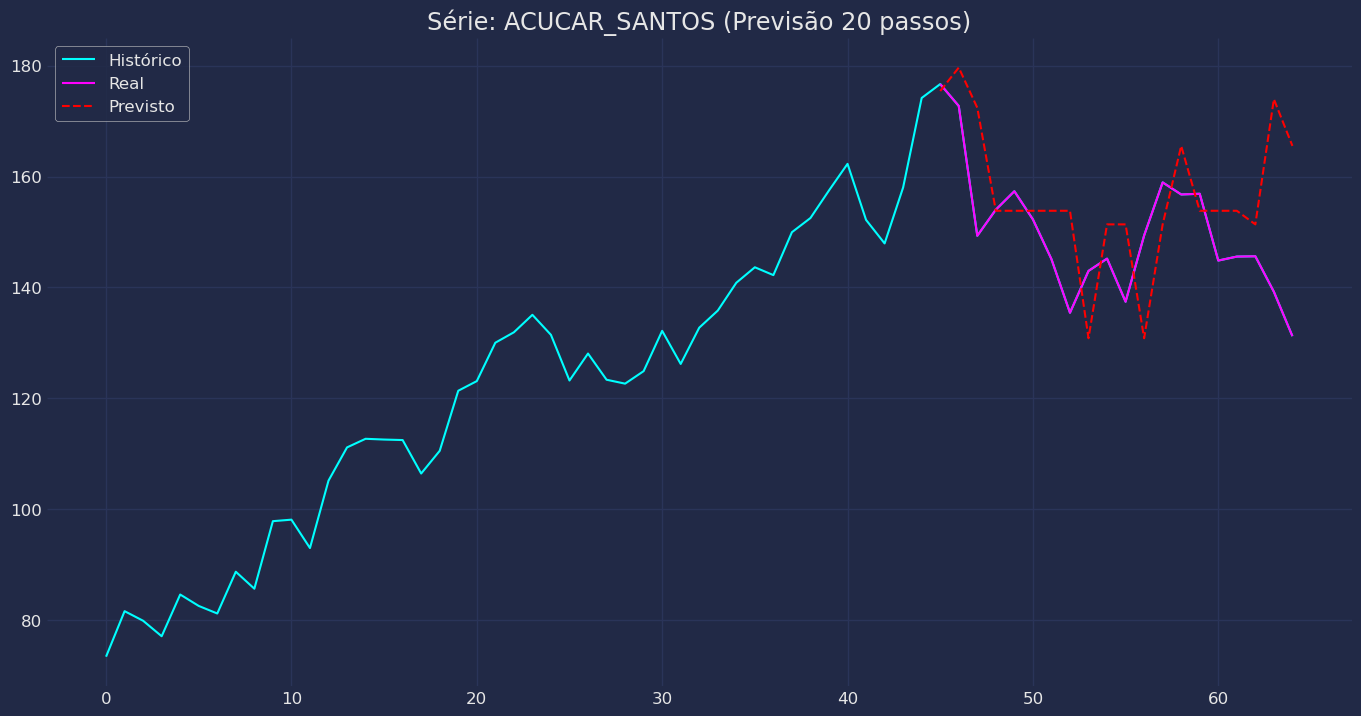


=== Série: ACUCAR_SP ===

=== Série: ACUCAR_SP (horizon=80) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=5)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_

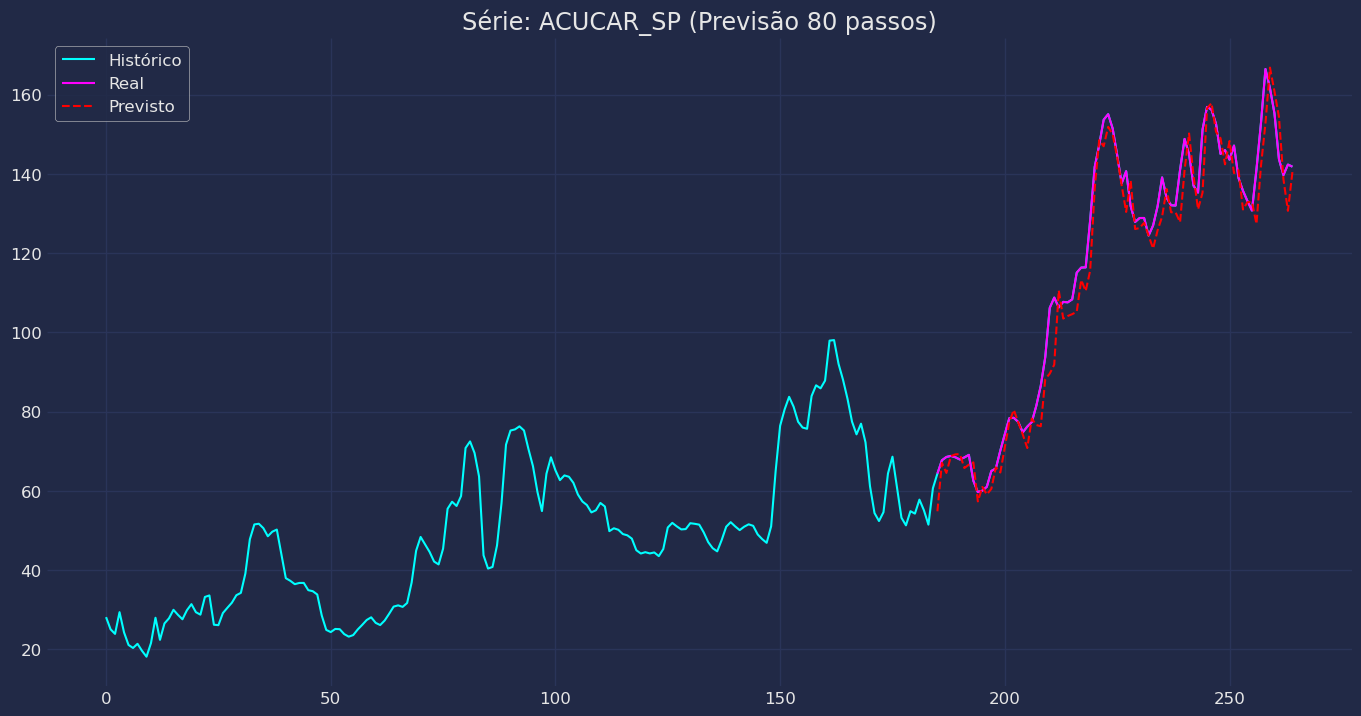


=== Série: ALGODAO ===

=== Série: ALGODAO (horizon=105) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=5)
RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=5)
RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=5)
RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=5)
RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=5)
RandomForestRegressor(ma

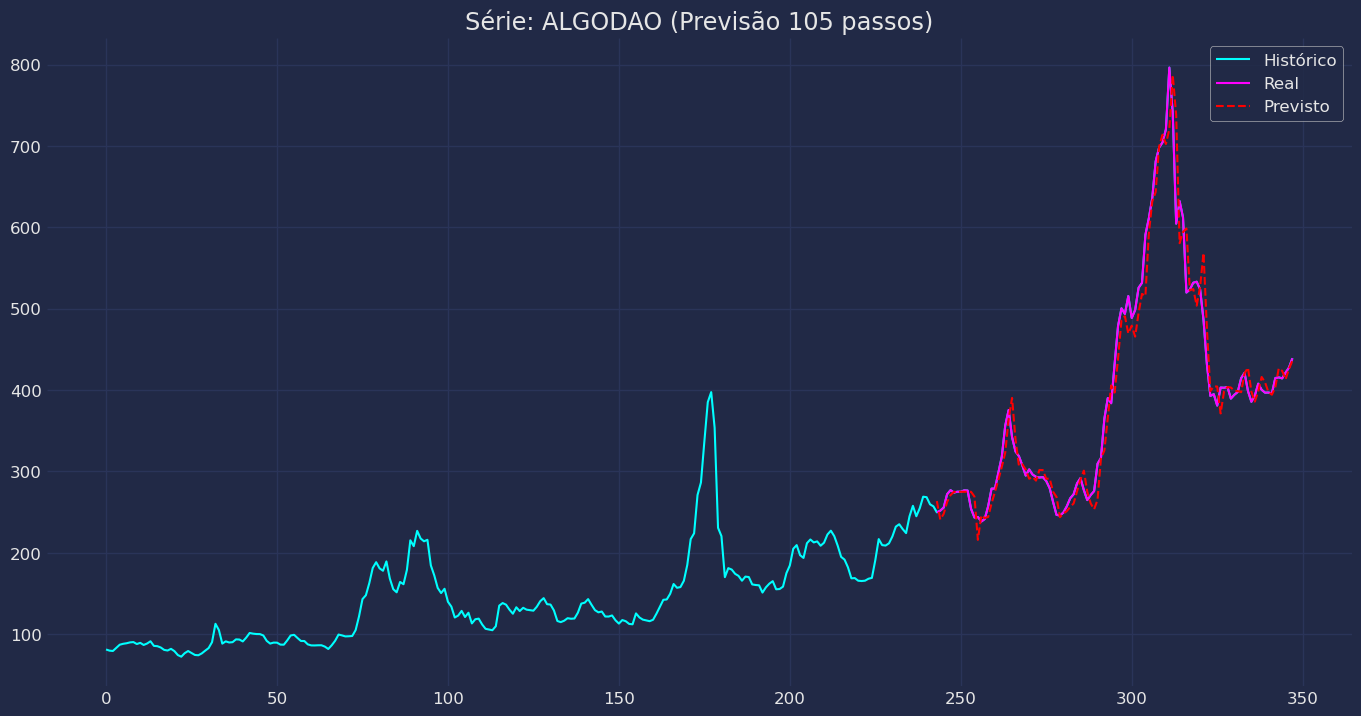


=== Série: ARROZ ===

=== Série: ARROZ (horizon=72) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=5)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=5)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

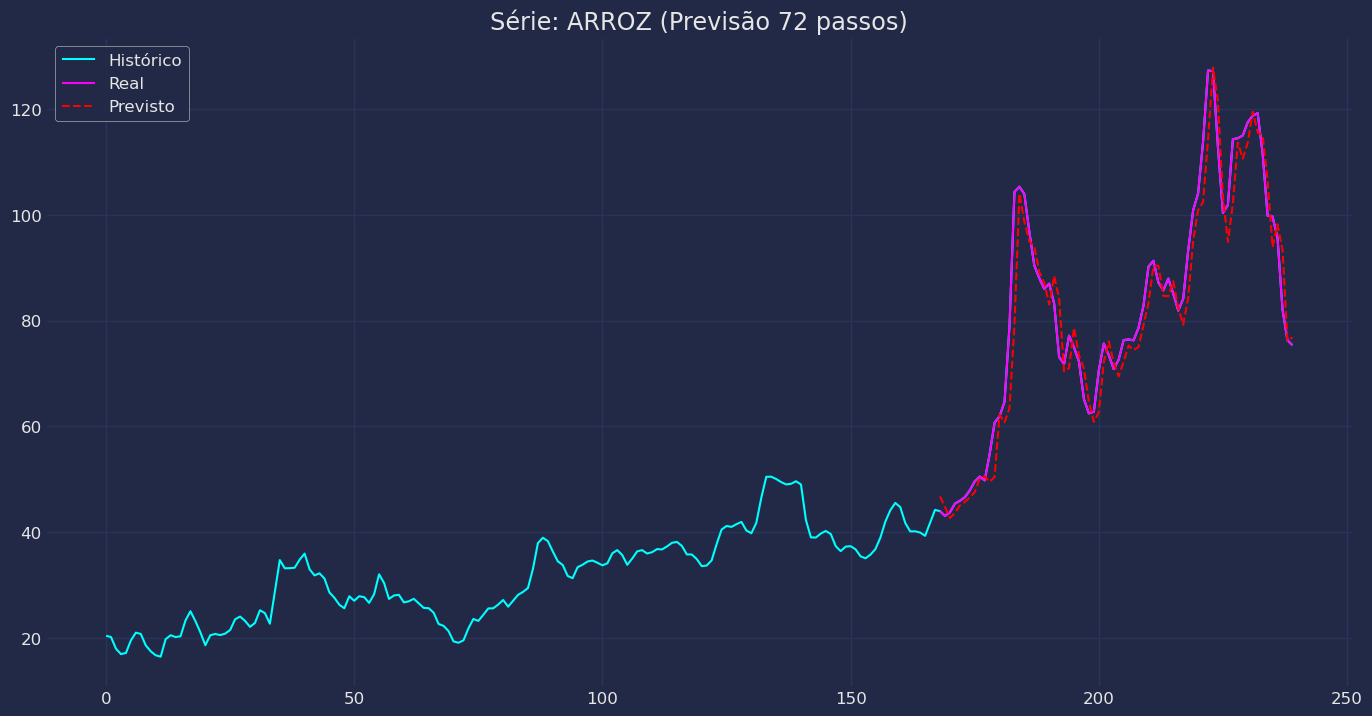


=== Série: CAFE_ARABICA ===

=== Série: CAFE_ARABICA (horizon=104) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=5)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categori

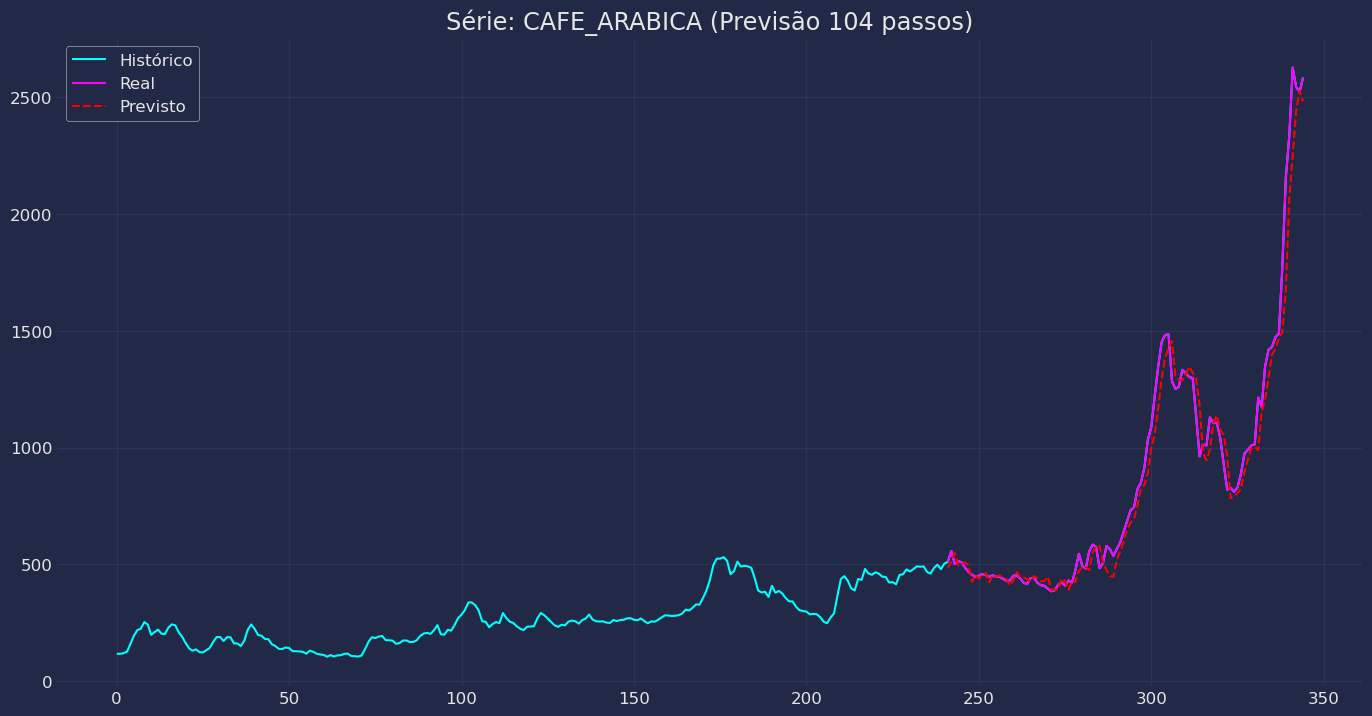


=== Série: CAFE_ROBUSTA ===

=== Série: CAFE_ROBUSTA (horizon=87) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03125, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=50,
             n_jobs=None, num_parallel_tree=None, ...)
RandomFores

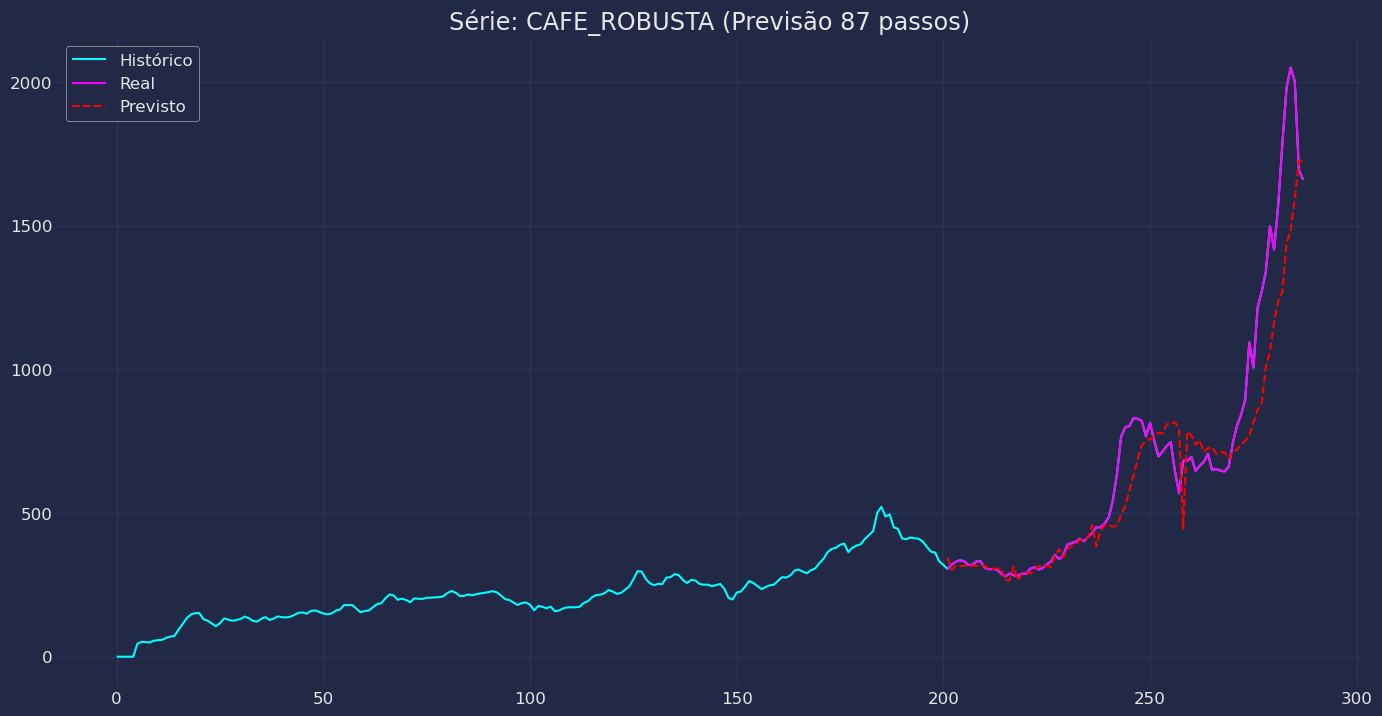


=== Série: MILHO ===

=== Série: MILHO (horizon=75) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=5)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,

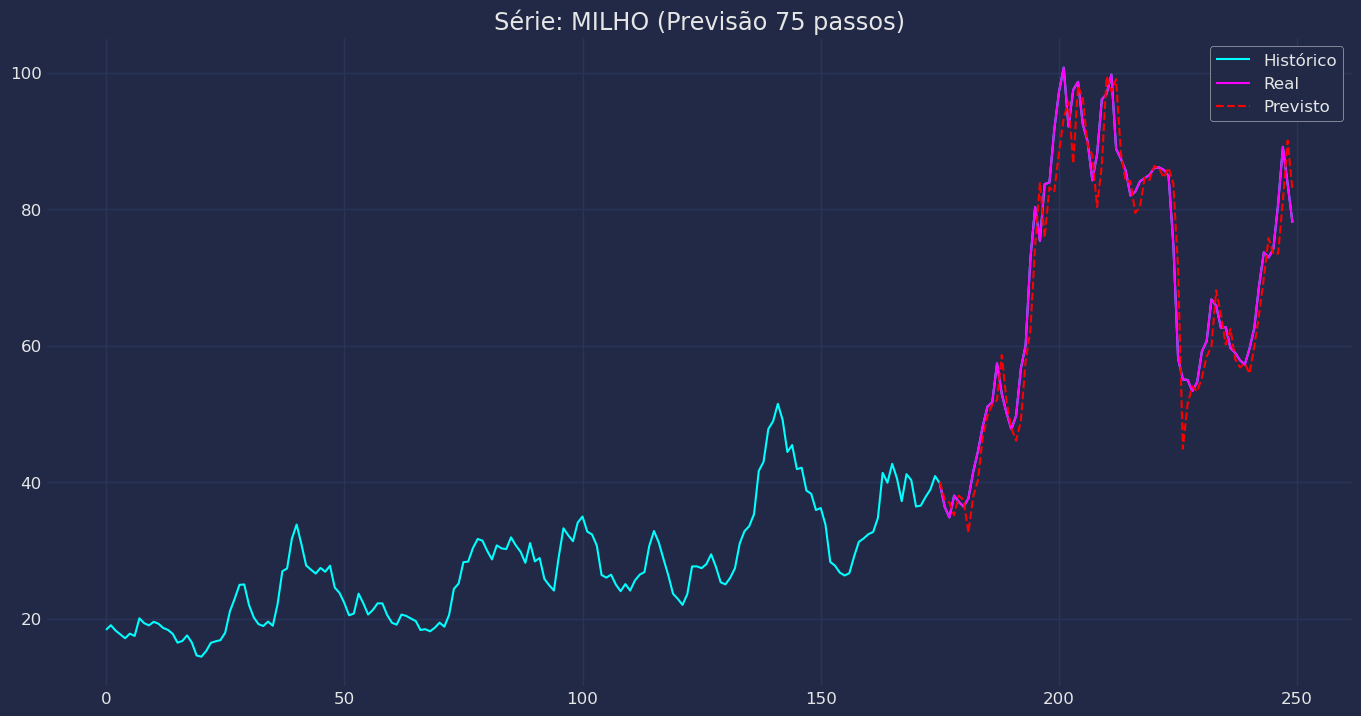


=== Série: SOJA_PARANA ===

=== Série: SOJA_PARANA (horizon=101) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03125, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=50,
             n_jobs=None, num_parallel_tree=None, ...)
MLPRegressor

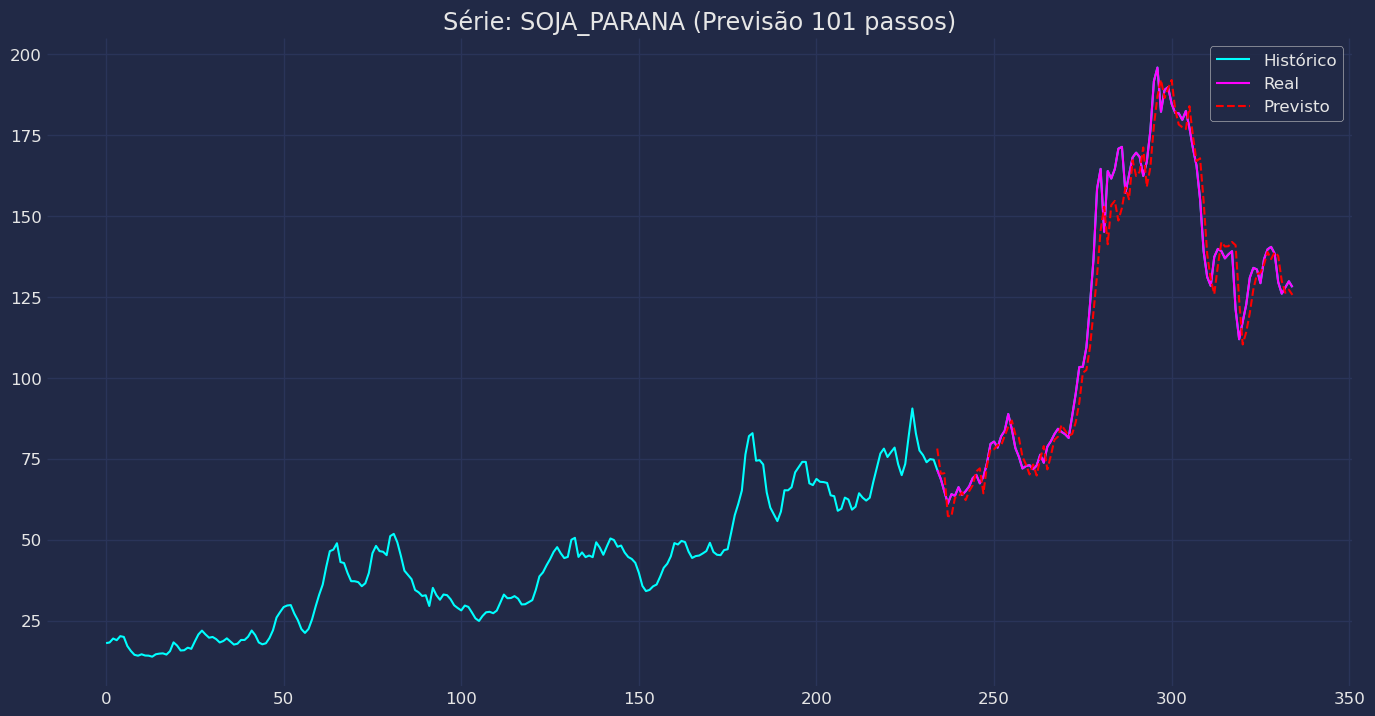


=== Série: SOJA_PARANAGUA ===

=== Série: SOJA_PARANAGUA (horizon=70) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=5)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=5

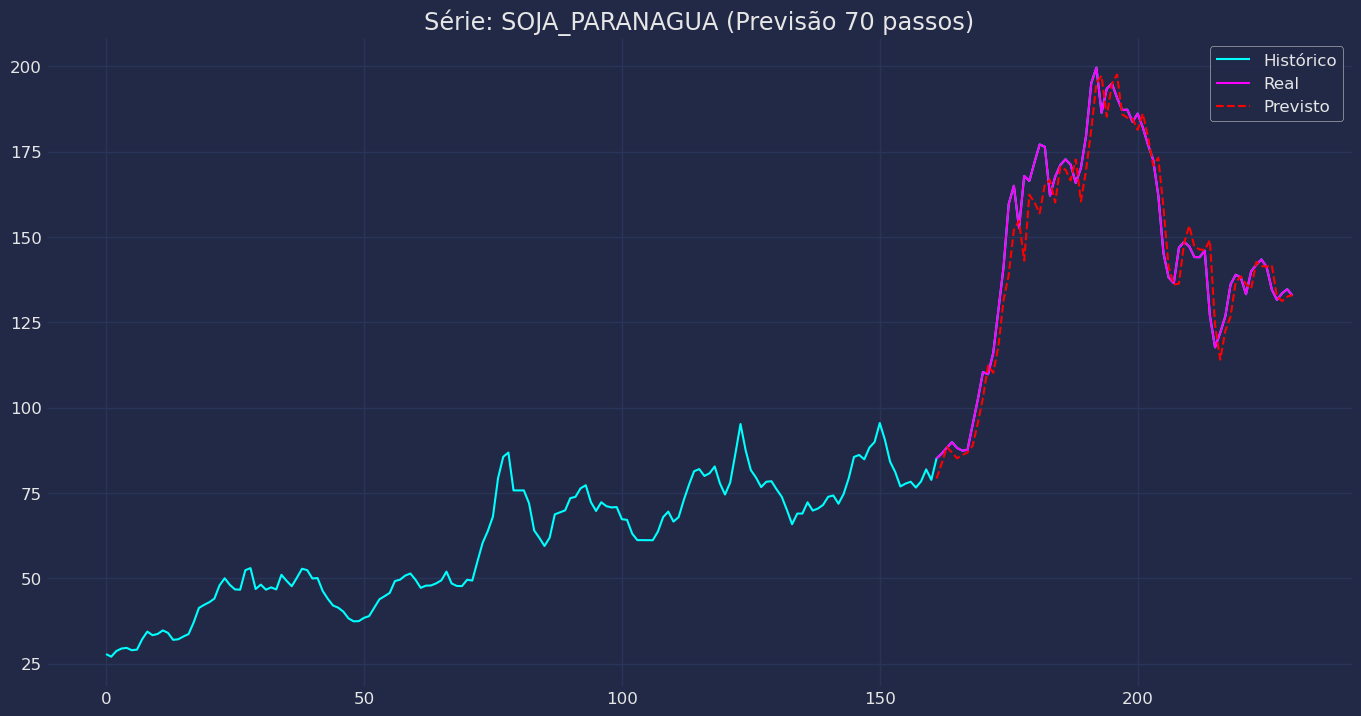


=== Série: TRIGO_PARANA ===

=== Série: TRIGO_PARANA (horizon=77) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
MLPRegressor(hidden_layer_size

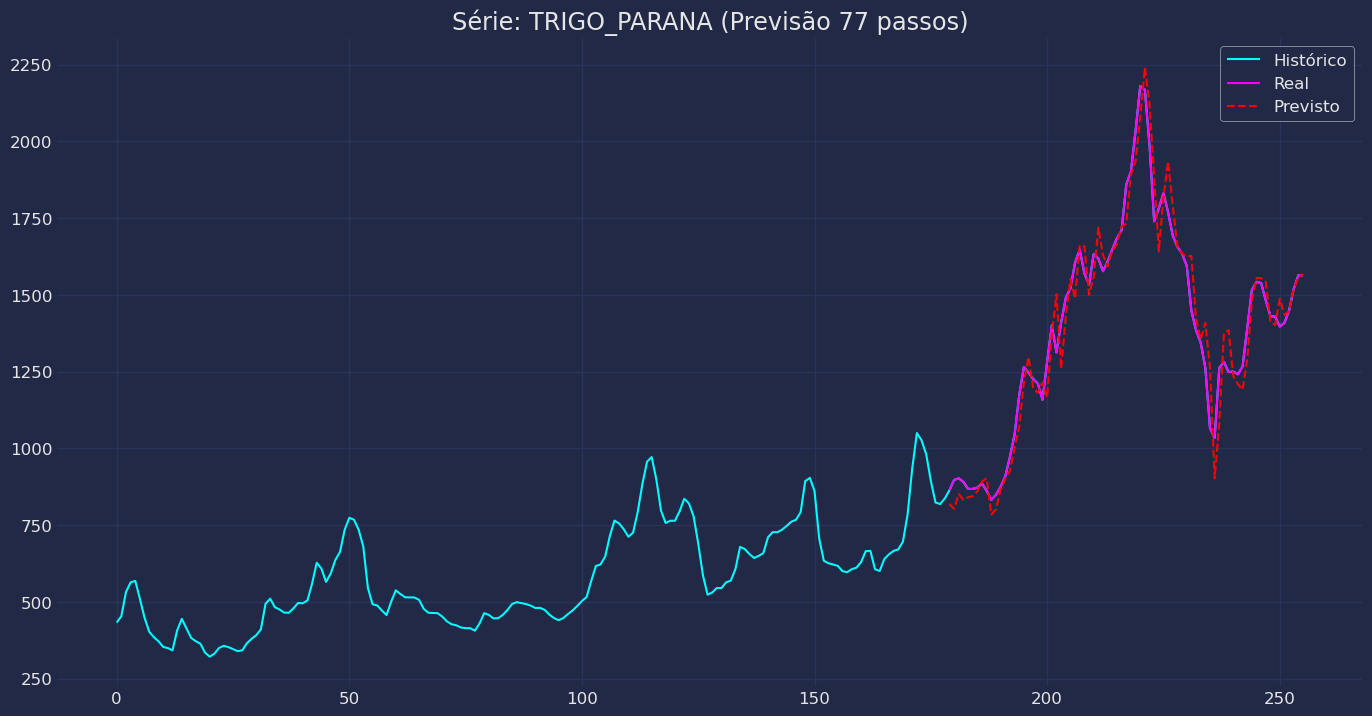


=== Série: TRIGO_RS ===

=== Série: TRIGO_RS (horizon=77) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=5)
MLPRegressor(hidden_layer_sizes=(64, 32

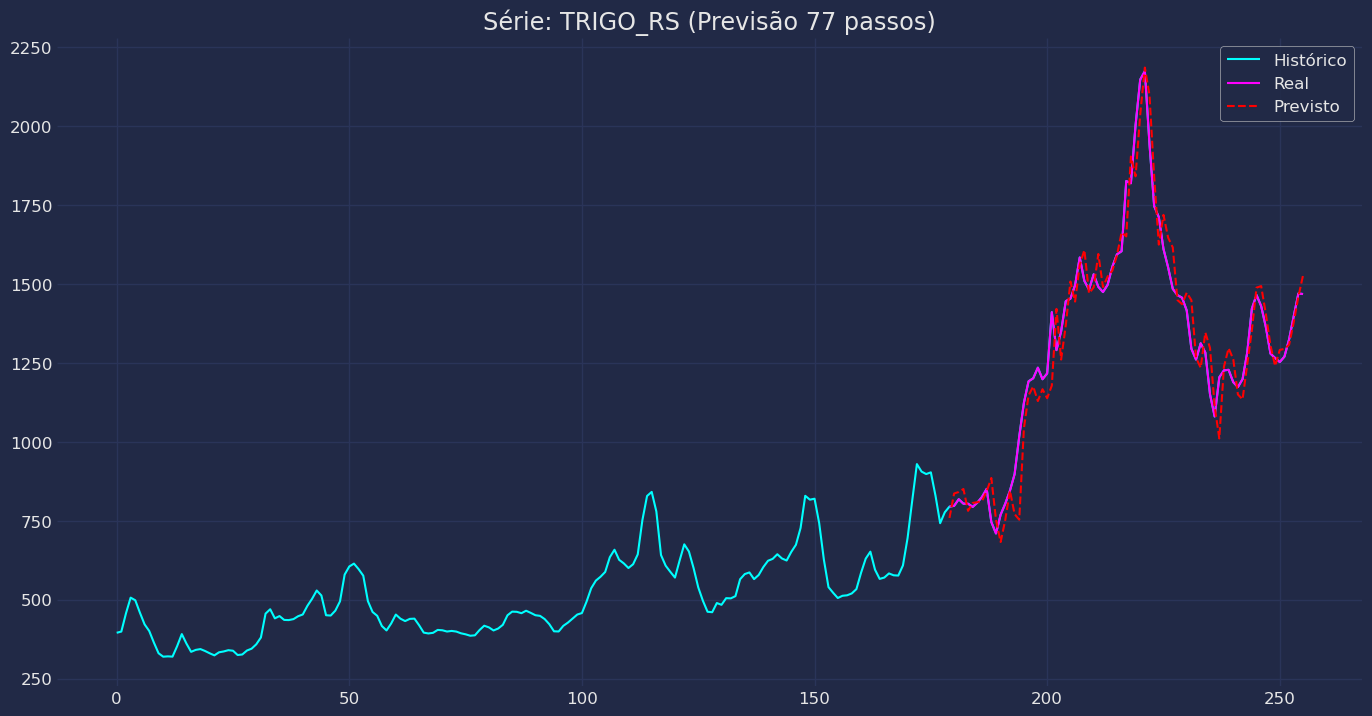


Resumo das métricas:
         unique_id           mse        rmse         mae      mape
0    ACUCAR_SANTOS    222.171098   14.905405   11.292477  0.078827
1        ACUCAR_SP     40.637813    6.374779    4.753734  0.041511
2          ALGODAO    749.115731   27.369979   17.668632  0.043145
3            ARROZ     35.963756    5.996979    4.251852  0.050434
4     CAFE_ARABICA  10163.709032  100.815222   62.510998  0.064939
5     CAFE_ROBUSTA  28910.080885  170.029647  101.598179  0.111580
6            MILHO     25.168279    5.016800    3.836685  0.055858
7      SOJA_PARANA     63.146187    7.946457    5.812402  0.047540
8   SOJA_PARANAGUA     64.070270    8.004391    5.855351  0.039919
9     TRIGO_PARANA   6685.808450   81.766793   62.187478  0.046286
10        TRIGO_RS   7228.894577   85.022906   64.786869  0.051041


In [7]:
dcs = DCSLARegressor(models, top_k=1, similarity='euclidean')

results = []

for uid in df_brl['unique_id'].unique():
    print(f"\n=== Série: {uid} ===")

    horizon = series_test_sizes.get(uid)
    print(f"\n=== Série: {uid} (horizon={horizon}) ===")
    y_series = df_brl[df_brl['unique_id'] == uid]['y'].values

    y_train = y_series[:-horizon]
    windows, targets = dcs._extract_lag_windows(y_train)
    dcs.fit(windows, targets)

    forecast, y_real_future = dcs.predict(y_series, horizon=horizon)

    mse = mean_squared_error(y_real_future, forecast)
    rmse = root_mean_squared_error(y_real_future, forecast)
    mae = mean_absolute_error(y_real_future, forecast)
    mape = mean_absolute_percentage_error(y_real_future, forecast)

    results.append({
        "unique_id": uid,
        "horizon": horizon,
        "mse": mse,
        "rmse": rmse,
        "mae": mae,
        "mape": mape,
        "y_real_future": y_real_future,
        "forecast": forecast
    })

    print("Valores reais:    ", np.round(y_real_future, 2).tolist())
    print("Valores previstos:", np.round(forecast, 2).tolist())
    print(f"MSE: {mse:.2f} | RMSE: {rmse:.2f} | MAE: {mae:.2f} | MAPE: {mape:.2f}%")

    # plotar série inteira
    plt.figure(figsize=(15, 8))
    plt.plot(y_series, label="Histórico", color="cyan")
    plt.plot(range(len(y_series)-horizon, len(y_series)), y_real_future, label="Real", color="fuchsia")
    plt.plot(range(len(y_series)-horizon, len(y_series)), forecast, label="Previsto", color="red", linestyle="--")
    plt.title(f"Série: {uid} (Previsão {horizon} passos)")
    plt.legend()
    plt.show()

# Converter resultados em DataFrame para análise geral
df_results = pd.DataFrame(results)
print("\nResumo das métricas:")
print(df_results[["unique_id", "mse", "rmse", "mae", "mape"]])

In [8]:
for model in dcs.history_errors:
    print("############### Model ###############")
    print(model)
    print("Error history:")
    print(dcs.history_errors.get(model))
    print("Times used:")
    print(len(dcs.history_errors.get(model)))

############### Model ###############
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
Error history:
[23.080579603521585, 9.505139644232266, 4.01999635370413, 2.3482140081463285, 1.940466148278631, 0.8778111809427145, 4.801675898032087, 10.220879713298686, 16.91895329268874, 13.85459354156967, 7.678510481644082, 25.76654510125792, 22.051956326266662, 10.685509035002326, 22.3475209114753, 44.36513293289255, 2.7959098668729823, 0.90381477470725, 2.0306746433873286, 10.285446827840097, 26.038870641780818, 28.303675054034898, 23.187089084175682, 14.75852774572786, 20.817131982258502, 16.707020684742304, 51.68792919327859, 15.97627132026139, 75.23242571525844, 103.63110691879046, 37.949094651910514, 29.661480774340134, 1.2228997873141338, 6.545927595942828, 16.601392620649335, 1.1044051499994225, 34.428080705951345, 15.823731121547894, 10.61450332798097, 8.87890069238477


=== Série: ACUCAR_SANTOS ===

=== Série: ACUCAR_SANTOS (horizon=20) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
         

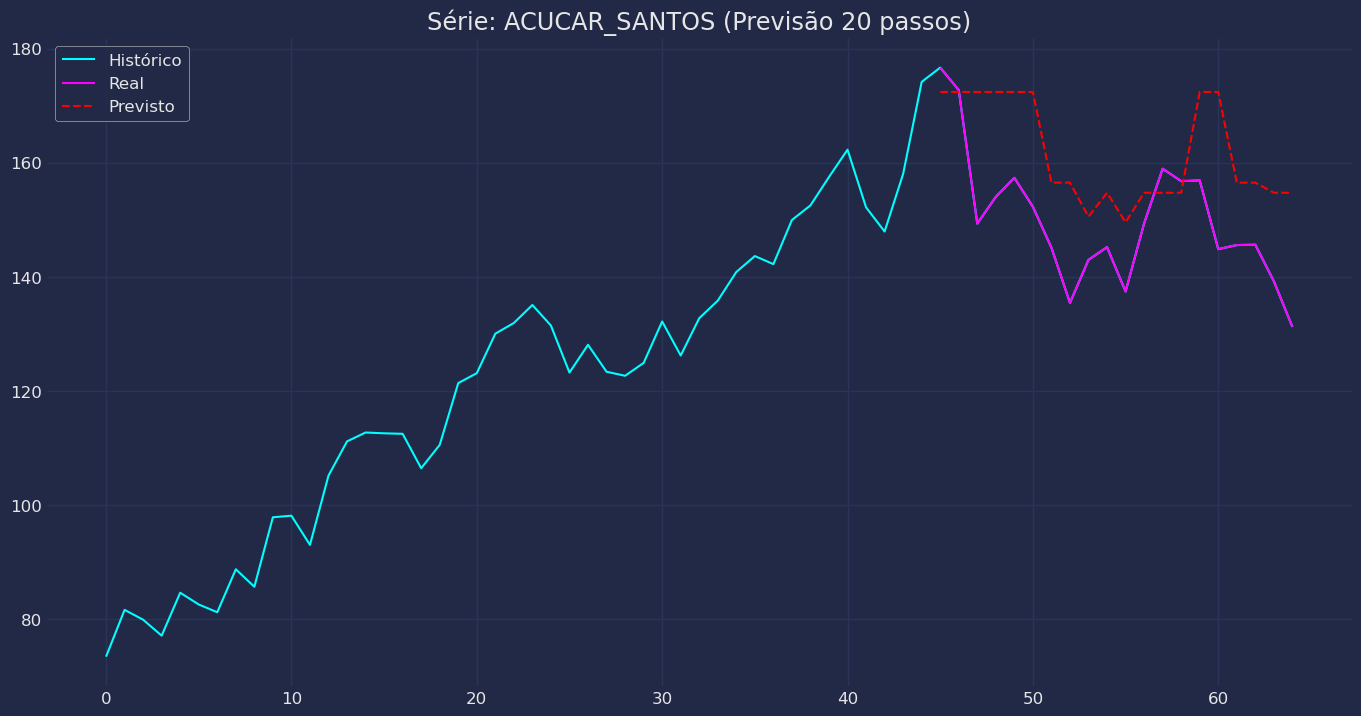


=== Série: ACUCAR_SP ===

=== Série: ACUCAR_SP (horizon=80) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num

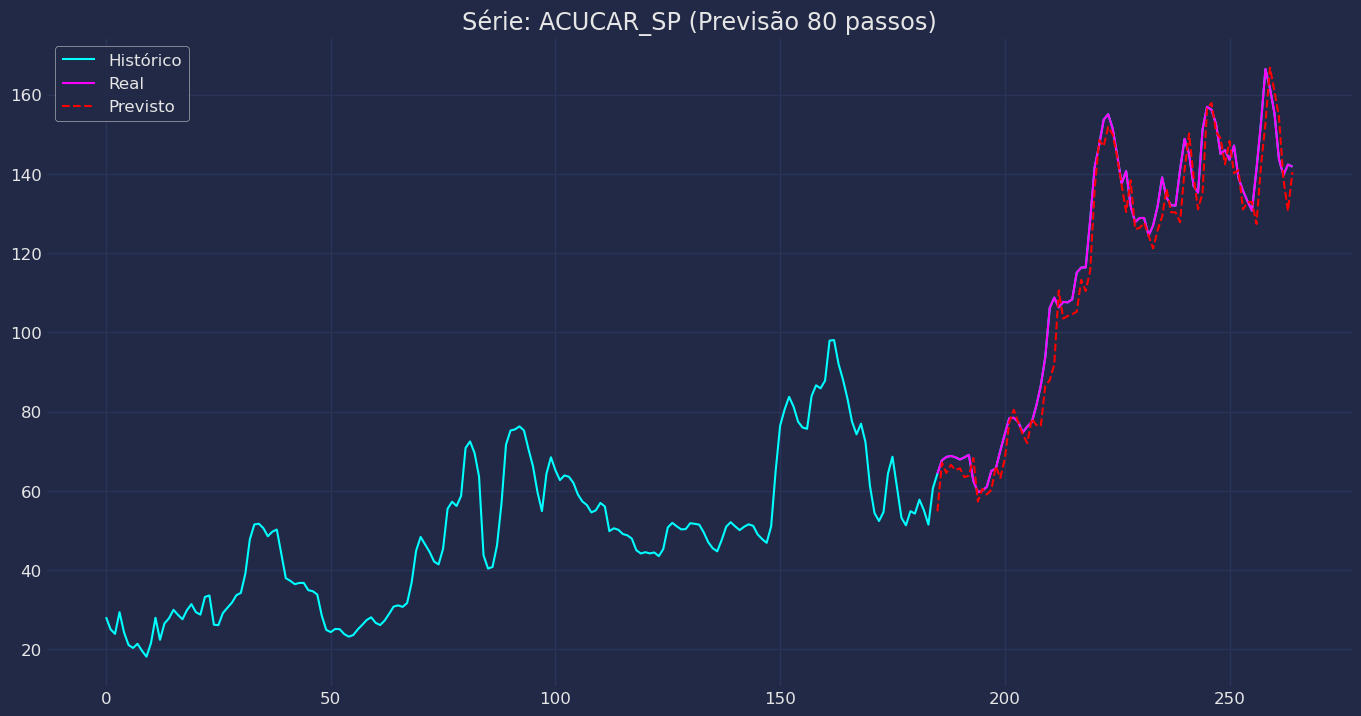


=== Série: ALGODAO ===

=== Série: ALGODAO (horizon=105) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_le

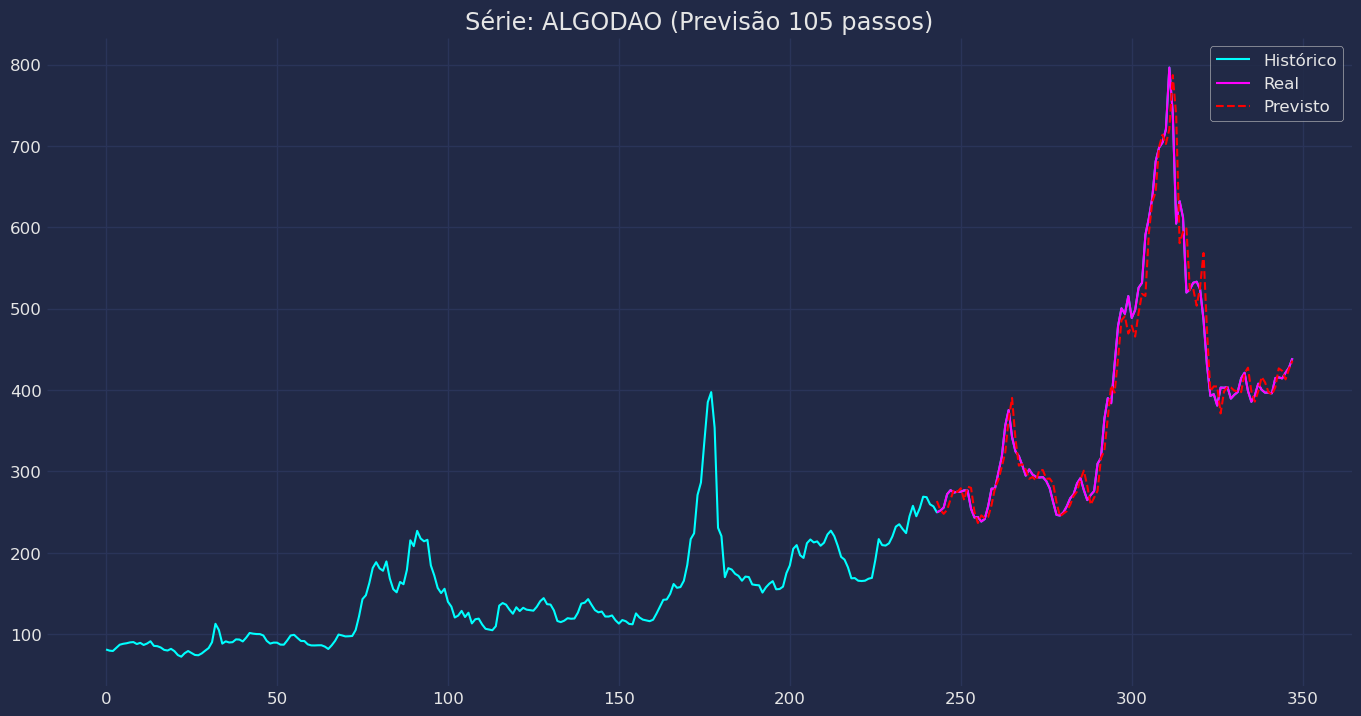


=== Série: ARROZ ===

=== Série: ARROZ (horizon=72) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
MLPRegressor(hidden_

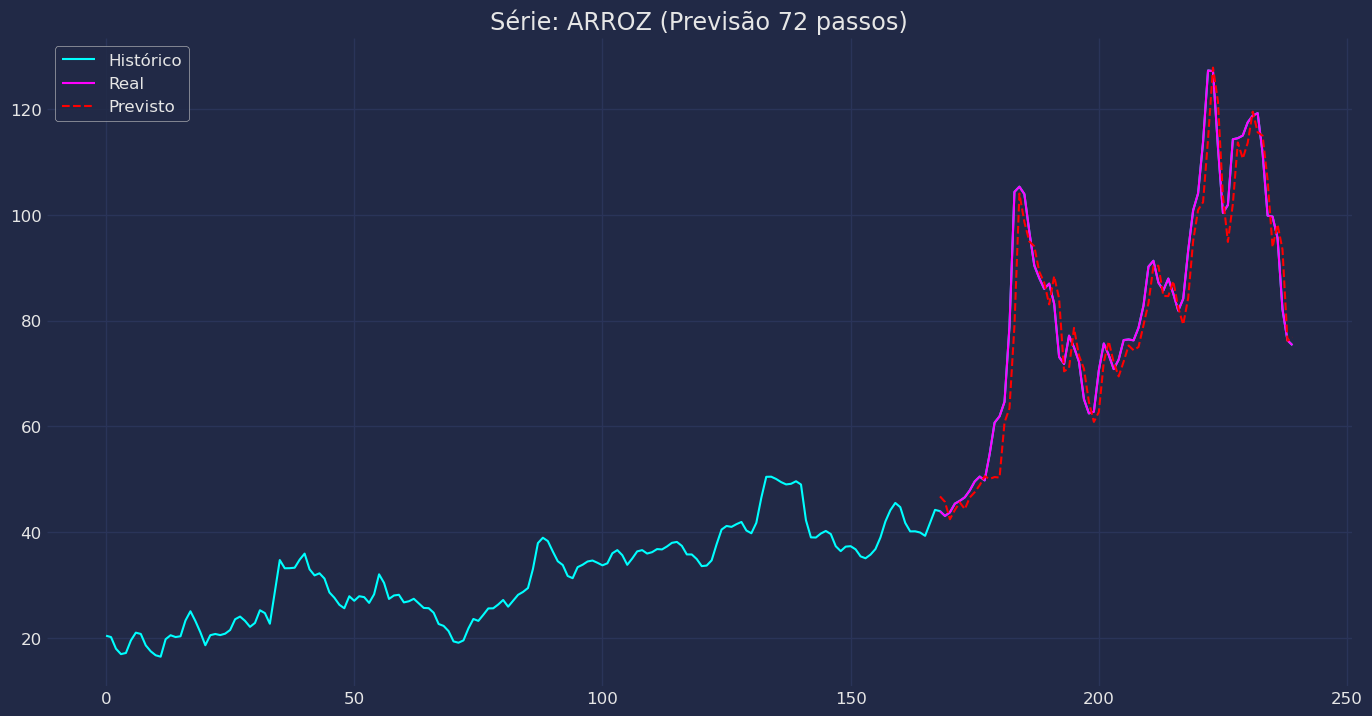


=== Série: CAFE_ARABICA ===

=== Série: CAFE_ARABICA (horizon=104) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
          

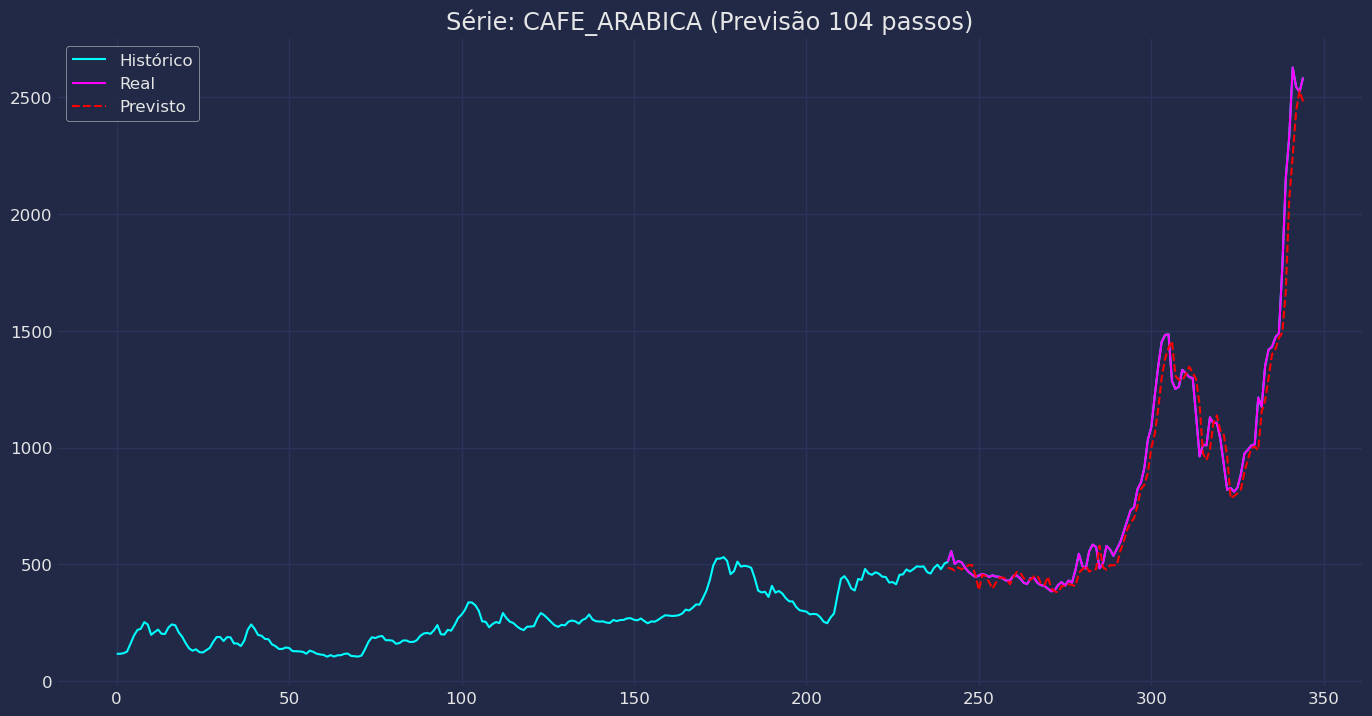


=== Série: CAFE_ROBUSTA ===

=== Série: CAFE_ROBUSTA (horizon=87) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=5)
RandomFo

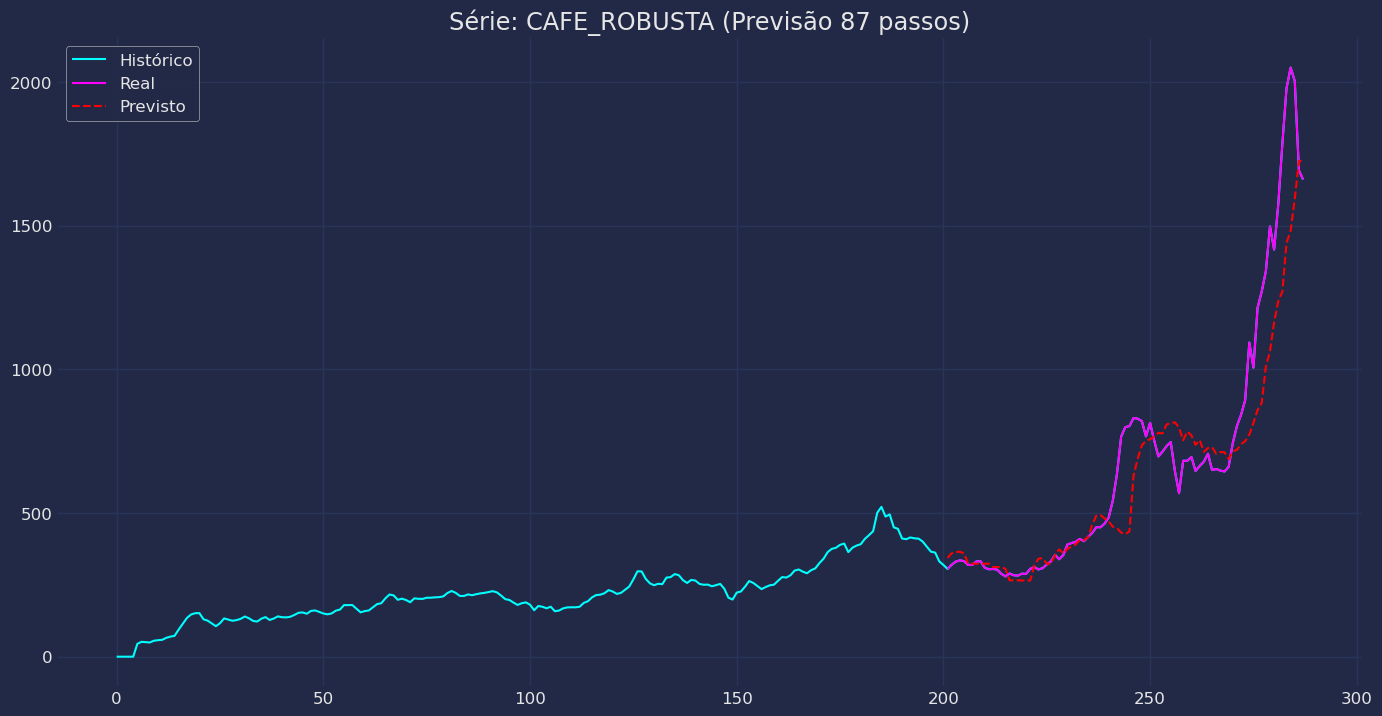


=== Série: MILHO ===

=== Série: MILHO (horizon=75) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=

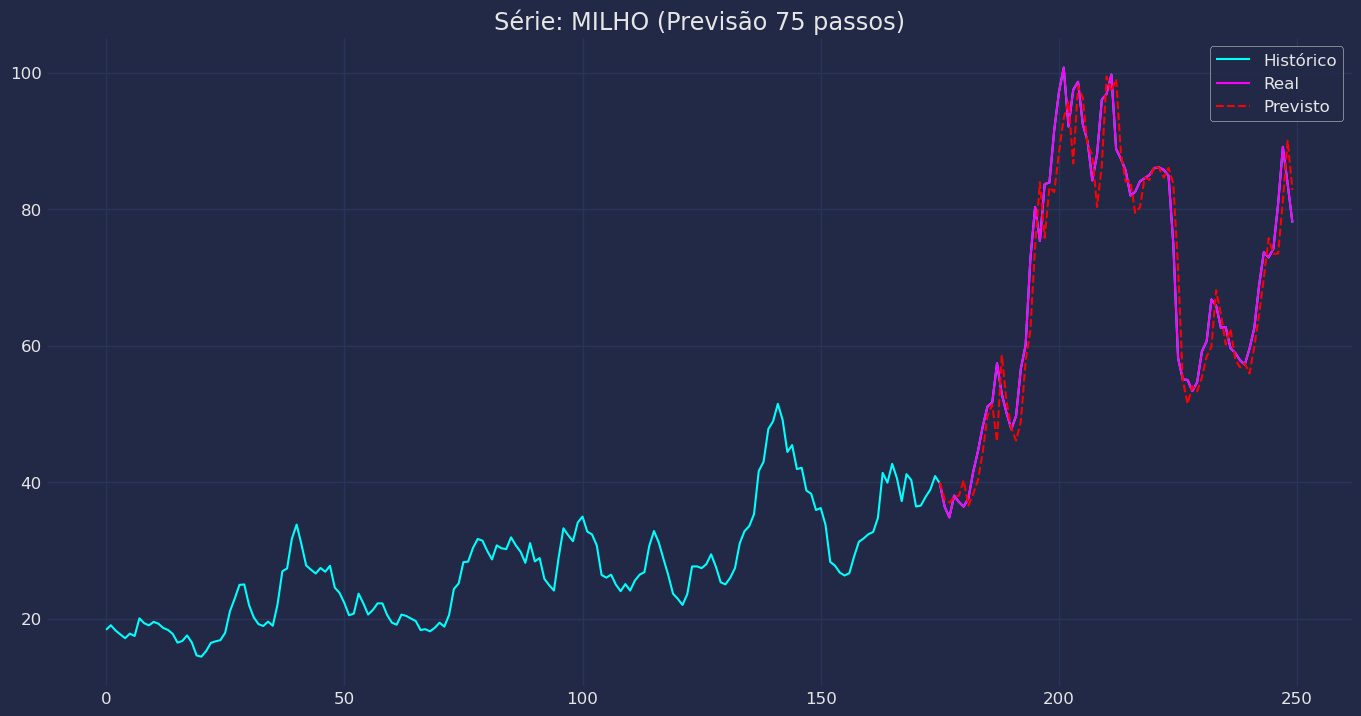


=== Série: SOJA_PARANA ===

=== Série: SOJA_PARANA (horizon=101) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=5)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegre

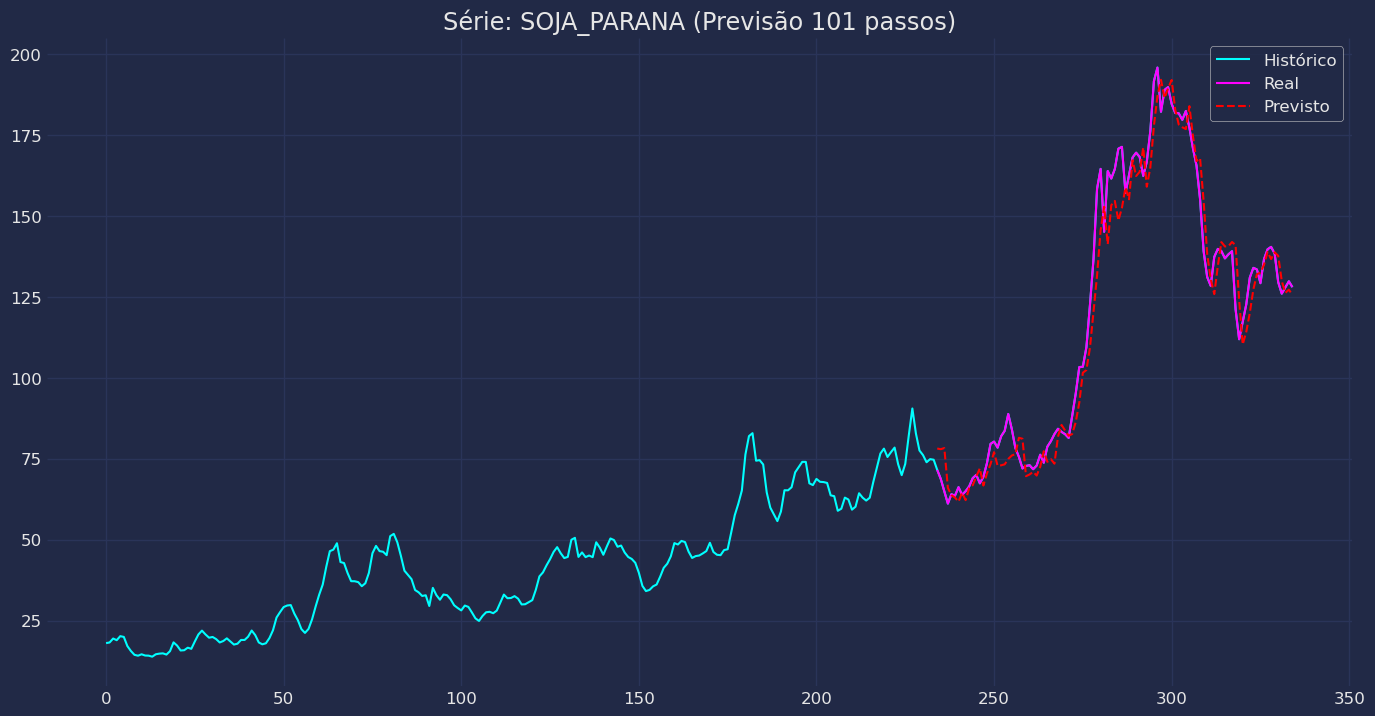


=== Série: SOJA_PARANAGUA ===

=== Série: SOJA_PARANAGUA (horizon=70) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
       

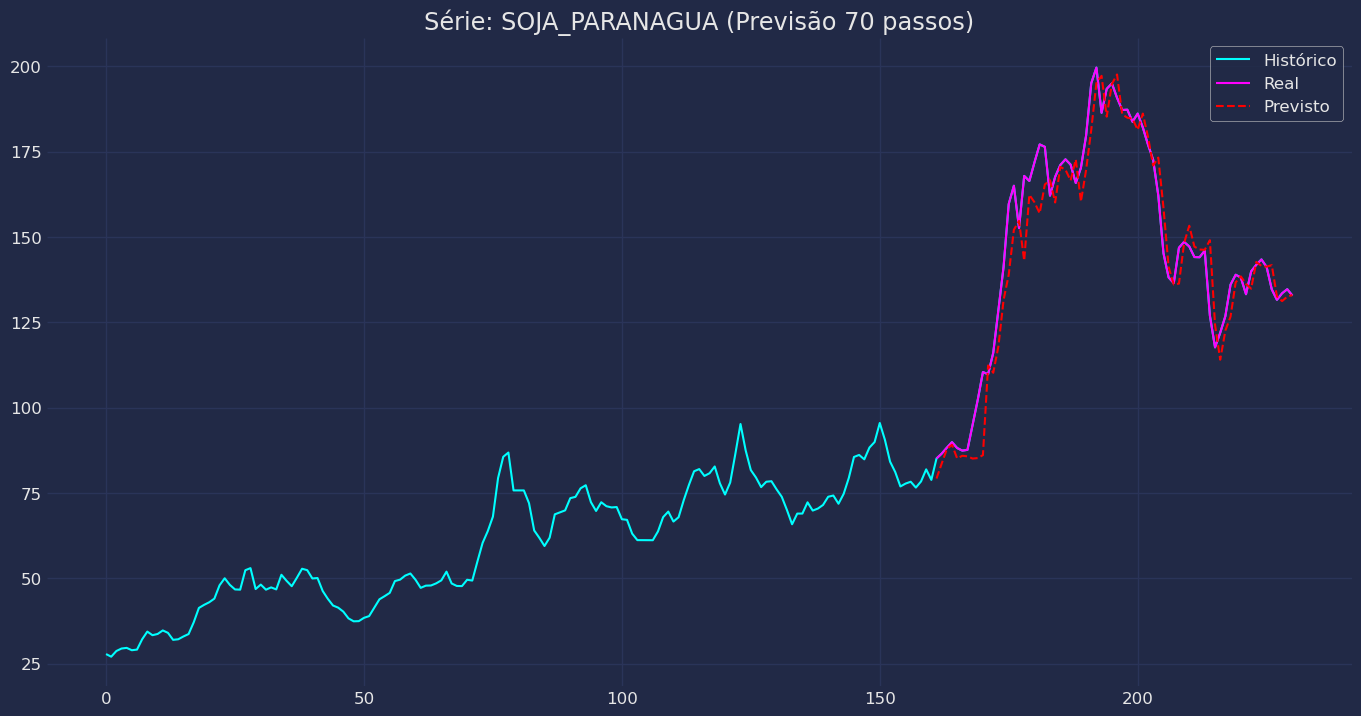


=== Série: TRIGO_PARANA ===

=== Série: TRIGO_PARANA (horizon=77) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
           

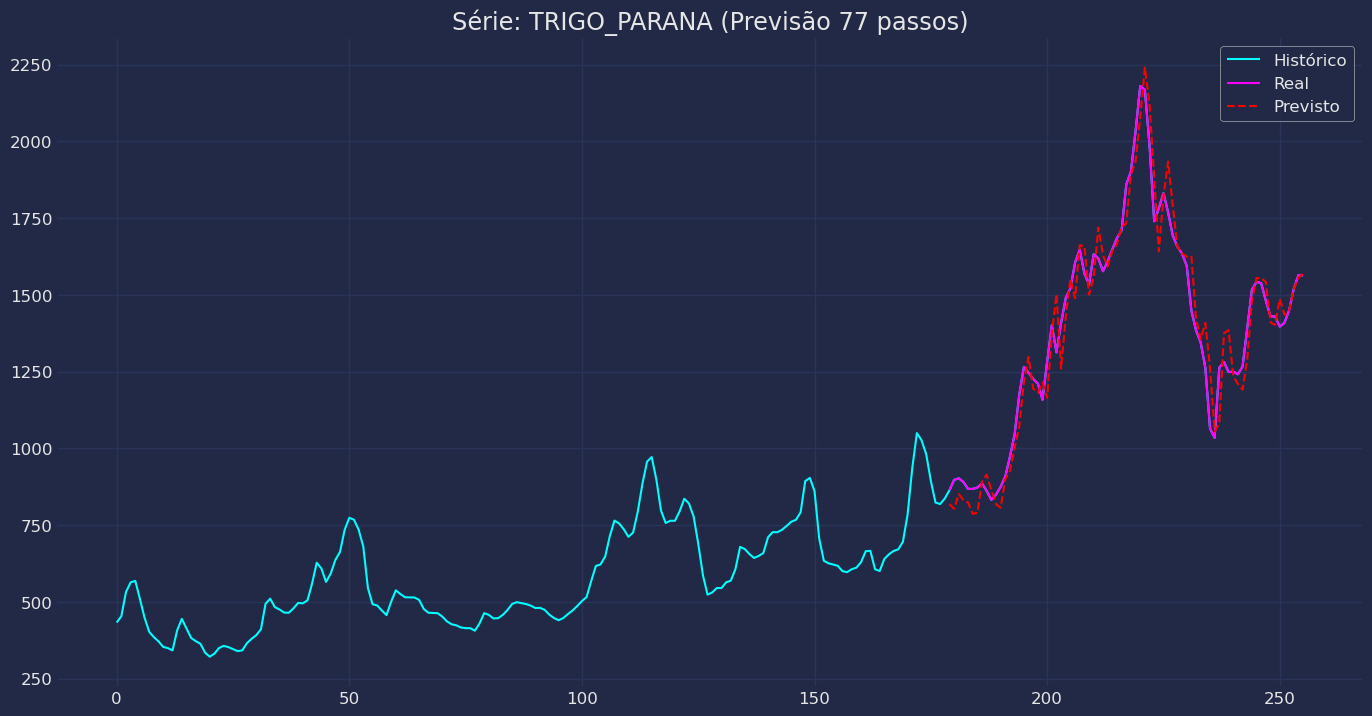


=== Série: TRIGO_RS ===

=== Série: TRIGO_RS (horizon=77) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_l

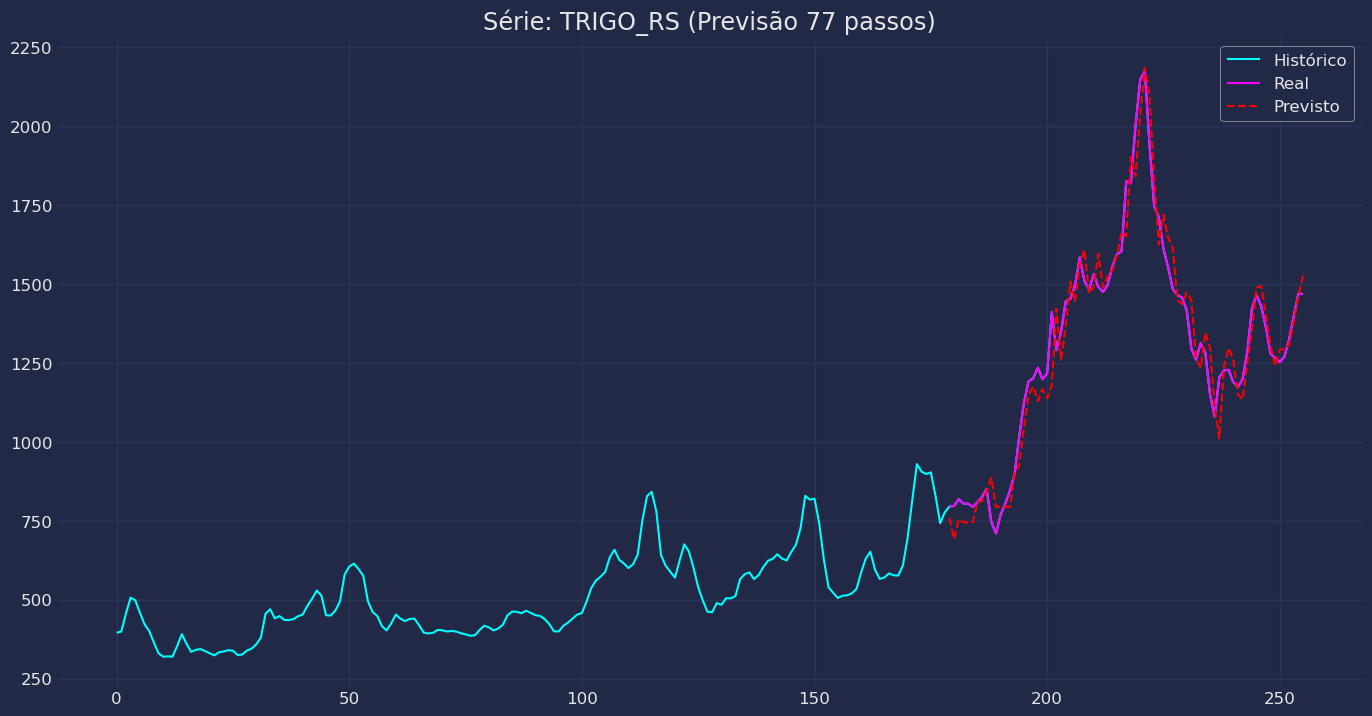


Resumo das métricas:
         unique_id           mse        rmse         mae      mape
0    ACUCAR_SANTOS    223.567005   14.952157   12.922137  0.088678
1        ACUCAR_SP     42.926396    6.551824    4.980362  0.044610
2          ALGODAO    732.401714   27.062921   17.322651  0.041728
3            ARROZ     37.872291    6.154047    4.435594  0.053563
4     CAFE_ARABICA  10377.052605  101.867819   65.099969  0.069841
5     CAFE_ROBUSTA  30588.313681  174.895151  105.469632  0.120433
6            MILHO     25.030504    5.003049    3.756506  0.053997
7      SOJA_PARANA     71.127374    8.433705    6.435300  0.055376
8   SOJA_PARANAGUA     75.977237    8.716492    6.282362  0.043954
9     TRIGO_PARANA   6686.581447   81.771520   63.138018  0.047621
10        TRIGO_RS   6460.530219   80.377424   63.262079  0.049949


In [9]:
dcs = DCSLARegressor(models_top_k_10, top_k=10, similarity='euclidean')

results = []

for uid in df_brl['unique_id'].unique():
    print(f"\n=== Série: {uid} ===")

    horizon = series_test_sizes.get(uid)
    print(f"\n=== Série: {uid} (horizon={horizon}) ===")
    y_series = df_brl[df_brl['unique_id'] == uid]['y'].values

    y_train = y_series[:-horizon]
    windows, targets = dcs._extract_lag_windows(y_train)
    dcs.fit(windows, targets)

    forecast, y_real_future = dcs.predict(y_series, horizon=horizon)

    mse = mean_squared_error(y_real_future, forecast)
    rmse = root_mean_squared_error(y_real_future, forecast)
    mae = mean_absolute_error(y_real_future, forecast)
    mape = mean_absolute_percentage_error(y_real_future, forecast)

    results.append({
        "unique_id": uid,
        "horizon": horizon,
        "mse": mse,
        "rmse": rmse,
        "mae": mae,
        "mape": mape,
        "y_real_future": y_real_future,
        "forecast": forecast
    })

    print("Valores reais:    ", np.round(y_real_future, 2).tolist())
    print("Valores previstos:", np.round(forecast, 2).tolist())
    print(f"MSE: {mse:.2f} | RMSE: {rmse:.2f} | MAE: {mae:.2f} | MAPE: {mape:.2f}%")

    # plotar série inteira
    plt.figure(figsize=(15, 8))
    plt.plot(y_series, label="Histórico", color="cyan")
    plt.plot(range(len(y_series)-horizon, len(y_series)), y_real_future, label="Real", color="fuchsia")
    plt.plot(range(len(y_series)-horizon, len(y_series)), forecast, label="Previsto", color="red", linestyle="--")
    plt.title(f"Série: {uid} (Previsão {horizon} passos)")
    plt.legend()
    plt.show()

# Converter resultados em DataFrame para análise geral
df_results = pd.DataFrame(results)
print("\nResumo das métricas:")
print(df_results[["unique_id", "mse", "rmse", "mae", "mape"]])

In [10]:
for model in dcs.history_errors:
    print("############### Model ###############")
    print(model)
    print("Error history:")
    print(dcs.history_errors.get(model))
    print("Times used:")
    print(len(dcs.history_errors.get(model)))

############### Model ###############
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
Error history:
[4.270197338834322, 0.32407829121527243, 23.080579603521585, 18.377876254239283, 15.050053287732112, 20.12292170878473, 15.507948024574205, 27.55333079969384, 9.505139644232266, 0.5872952707748738, 4.01999635370413, 2.2559448464331666, 3.2065367460094762, 2.2103920646198816, 4.999166129450721, 5.225425309898597, 2.3482140081463285, 0.4659470662480203, 1.940466148278631, 4.776114110802041, 0.5776813448611335, 6.921072423408837, 6.25743540525194, 0.8778111809427145, 4.801675898032087, 10.220879713298686, 7.27319111934824, 18.23992664851353, 16.91895329268874, 13.85459354156967, 1.1207659814131148, 7.678510481644082, 19.183497426983877, 11.299399352607281, 3.625412874986239, 0.40108326046686216, 4.223327486324649, 11.996604236192695, 11.924248268503902, 2.79590986687298

- LSTM do Keras
- Verificar a formação das janelas
- Normalização da série no começo com MinMaxScaler
- Fine tunning da literatura
- Adicioanar ARIMA e ETS no pool
- Extra: Pool SVRs